In [1]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import os
# from io import StringIO
import io
from PIL import Image
import matplotlib.pyplot as plt
import time
import tensorflow as tf
%matplotlib inline

/Users/ajinkyapuar/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [8]:
def load_dataset():
    def load_images(filename):
        if (os.path.exists(filename)):
            # print filename
            np_imgs = []
            zf = ZipFile(filename, 'r')
            # print len(zf.namelist())
            # TODO: put len(zf.namelist())
            # print(len(zf.namelist()))
            #starting from 1 coz 1st element in namelist is folder name
            for i in range(1, len(zf.namelist())): 
                data = io.BytesIO(zf.read(zf.namelist()[i]))
                img = Image.open(data)
                np_imgs.append(np.array(img))
            return np_imgs

    def load_labels(filename):
        if (os.path.exists(filename)):
            # print filename
            return pd.read_csv(ZipFile(filename, 'r').open('labels.csv'))

    X_train = load_images('data/train.zip')
    Y_train = load_labels('data/labels.csv.zip')
    # X_test = []
    X_test = load_images('data/test.zip')
    return X_train, Y_train, X_test

In [9]:
X_train_orig, Y_train_orig, X_test_orig = load_dataset()
print("Dataset Loaded")

# print X_train
# print Y_train

Dataset Loaded


In [ ]:
##################################################################################

In [10]:
print(np.asarray(X_train_orig).shape)
print(len(X_train_orig))

print((len(Y_train_orig)))

print(np.asarray(X_test_orig).shape)
print(len(X_test_orig))

(10222,)
10222
10222
(10357,)
10357


In [17]:
x = np.array(X_train_orig)
print(x.shape)

(10222,)


In [30]:
##################################################################################

(375, 500, 3)


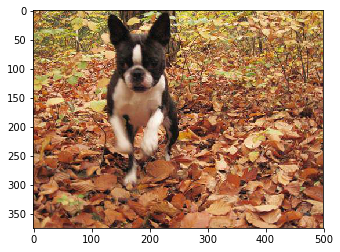

In [27]:
print(X_train_orig[0].shape)
plt.imshow(X_train_orig[0])

(500, 388, 3)


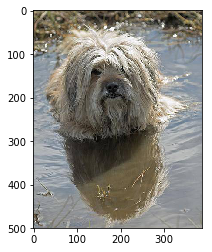

In [33]:
print(X_test_orig[10].shape)
plt.imshow(X_test_orig[10])

In [ ]:
##################################################################################

In [32]:
# Get Minimum Shape of Images in Train / Test
img_shapes = []
for i in range(len(X_test_orig)):
    # print(X_test_orig[i].shape)
    img_shapes.append(X_test_orig[i].shape)

# print(img_shapes)
img_min_shape = min(img_shapes)
print(img_min_shape)

()


(375, 500, 3)


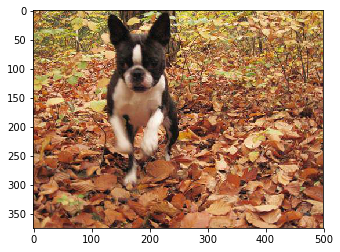

In [34]:
# Testing Numpy Array Replication
X_train = np.array(X_train_orig, copy=True)
print(X_train[0].shape)
plt.imshow(X_train[0])

(500, 388, 3)


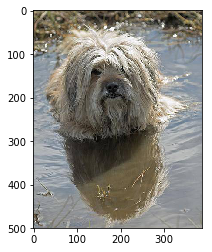

In [35]:
# Testing Numpy Array Replication
X_test = np.array(X_test_orig, copy=True)
print(X_test[10].shape)
plt.imshow(X_test[10])

In [ ]:
##################################################################################

In [ ]:
# Resize & Reshape Images
for i in range(len(X_train)):
    # print(np.resize(X_train_orig[i], img_min_shape).reshape((1, img_min_shape[0]*img_min_shape[1]*img_min_shape[2])).T)
    X_train[i] = np.resize(X_train[i], img_min_shape)\
        .reshape((1, img_min_shape[0]*img_min_shape[1]*img_min_shape[2])).T

print(X_train[0])
print(X_train[0].shape)

TypeError: slice indices must be integers or None or have an __index__ method

In [67]:
# Resize & Reshape Images
for i in range(len(X_test)):
    # print(np.resize(X_test_orig[i], img_min_shape).reshape((1, img_min_shape[0]*img_min_shape[1]*img_min_shape[2])).T)
    X_test[i] = np.resize(X_test[i], img_min_shape)\
        .reshape((1, img_min_shape[0]*img_min_shape[1]*img_min_shape[2])).T

print(X_test[0])
print(X_test[0].shape)

[[121]
 [133]
 [ 87]
 ...
 [ 72]
 [ 79]
 [ 11]]
(31500, 1)


In [71]:
print(X_train.shape)

(10222,)


In [ ]:
#######################################################################################

In [5]:
Y_sample = pd.read_csv(ZipFile('data/sample_submission.csv.zip', 'r').open('sample_submission.csv'), index_col=0)

In [6]:
Y_sample.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
id,,,,,,,,,,,,,,,,,,,,,
000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [7]:
all_breeds = list(Y_sample.columns)
print(all_breeds)

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

In [8]:
Y_train_orig.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
Y_train = pd.DataFrame(columns=all_breeds)

In [10]:
Y_train

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [11]:
Y_train_inter = Y_train_orig.copy(deep=True)

Y_train_inter.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
# Manipulating breed text into class number 
# TODO: Temp workaround, Find a way to fix this
for i, breed in enumerate(all_breeds):
    Y_train_inter[Y_train_inter['breed'] == breed] = i
    

Y_train_orig['class'] = Y_train_inter['breed']

In [13]:
Y_train_orig.head()

,id,breed,class
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37
2,001cdf01b096e06d78e9e5112d419397,pekinese,85
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49


In [19]:
def one_hot_matrix(labels, C):
    C = tf.constant(C, name='C')
    
    one_hot_matrix = tf.one_hot(labels, depth=C)
    
    sess = tf.Session()
    
    one_hot = sess.run(one_hot_matrix)
    
    sess.close()
    
    return one_hot

In [22]:
# Testing
# Figure out if one hot is correct for passing to the model, axis check required

a = [1,2,3,4,5]

a_hot = one_hot_matrix(a, C=5)

print(str(a_hot))

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


In [23]:
labels = list(Y_train_orig['class'])

one_hot = one_hot_matrix(labels, C=max(labels)+1)

In [24]:
print(str(one_hot[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(labels[0])

19
